In [1]:
import os 
import numpy as np 
     
# set names to the paths because they're too long 
data_path = 'D:\\Python\\MachineLearning\\MachineLearning\\project\\data\\handwritting' 
# train path 
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz') 
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz') 
# test path 
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz') 
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [2]:
def get_mnist_data(images_path, labels_path, num_images 
                   , shuffle=False, _is=True, image_size=28): 
    """ 
        This shuffle param is active when .gz is downloaded at: 
            - 'http://yann.lecun.com/exdb/mnist/' 
            - This function return random num_images in 60000 or 10000   
    """ 
    # read data 
    import gzip           # to decompress gz (zip) file 
 
    # open file training to read training data 
    f_images = gzip.open(images_path,'r') 
     
    # skip 16 first bytes because these are not data, only header infor 
    f_images.read(16) 
     
    # general: read num_images data samples if this parameter is set; 
    # if not, read all (60000 training or 10000 test) 
    real_num = num_images if not shuffle else (60000 if _is else 10000) 
 
    # read all data to buf_images (28x28xreal_num) 
    buf_images = f_images.read(image_size * image_size * real_num) 
     
    # images 
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32) 
    images = images.reshape(real_num, image_size, image_size,) 
     
    # Read labels    
    f_labels = gzip.open(labels_path,'r') 
    f_labels.read(8) 
     
    labels = np.zeros((real_num)).astype(np.int64) 
     
    # rearrange to correspond the images and labels 
    for i in range(0, real_num):    
        buf_labels = f_labels.read(1) 
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)[0]
     # shuffle to get random images data 
    if shuffle is True: 
        rand_id = np.random.randint(real_num, size=num_images) 
         
        images = images[rand_id, :] 
        labels = labels[rand_id,] 
     
    # change images data to type of vector 28x28 dimentional 
    images = images.reshape(num_images, image_size * image_size) 
    return images, labels 

In [7]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle=True) 
 
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True) 
 
print(train_images.shape, train_labels.shape) 
print(test_images.shape, test_labels.shape) 

(60000, 784) (60000,)
(10000, 784) (10000,)


Kích thước của dữ liệu sau khi giảm chiều: (60000, 2)
Dữ liệu sau khi giảm chiều:
[[ 0.39685756  2.4520745 ]
 [ 2.6655166  -0.7196844 ]
 [-1.7071346  -1.6180587 ]
 ...
 [-3.6027467   2.1193008 ]
 [-0.4468174   4.2319894 ]
 [ 2.0176556   0.96201986]]


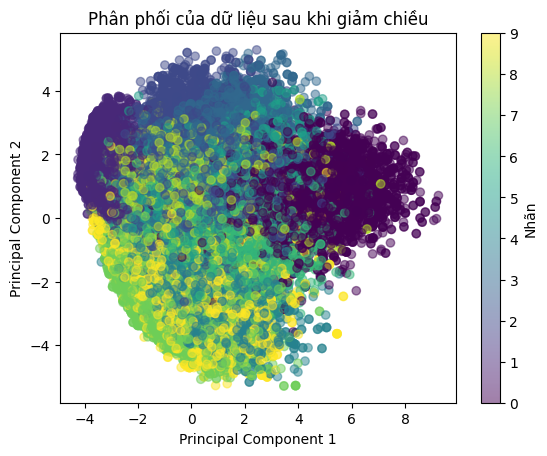

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dữ liệu được chuẩn hóa sử dụng công thức min-max scaling để đảm bảo rằng tất cả các giá trị nằm trong khoảng nhất định
train_images_norm = (train_images - train_images.min())/(train_images.max() - train_images.min())

# Giảm chiều dữ liệu về 2
pca = PCA(n_components=2)

# Fit và transform dữ liệu huấn luyện
train_images_pca = pca.fit_transform(train_images_norm)

# In kích thước của dữ liệu mới
print("Kích thước của dữ liệu sau khi giảm chiều:", train_images_pca.shape)

# In dữ liệu mới
print("Dữ liệu sau khi giảm chiều:")
print(train_images_pca)

# In biểu đồ phân bố của dữ liệu sau khi giảm chiều
plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Phân phối của dữ liệu sau khi giảm chiều')
plt.colorbar(label='Nhãn')
plt.show()


3. Xây dựng chương trình sử dụng Naive Bayes

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB

train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle=True) 
 
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True) 

train_images = train_images / 255.0
test_images = test_images / 255.0
# Huấn luyện mô hình Multinomial Naive Bayes
model = GaussianNB()
model.fit(train_images, train_labels)

# Dự đoán trên tập kiểm tra
nb_predictions = model.predict(test_images)

# Tính accuracy
nb_accuracy = accuracy_score(test_labels, nb_predictions)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb_accuracy * 100))

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(test_labels, nb_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Tính recall (tỷ lệ khôi phục)
nb_recall = recall_score(test_labels, nb_predictions, average='weighted')  # Sử dụng 'weighted' để tính trên các lớp không cân bằng
print("Recall of Naive Bayes: {:.2f}%".format(nb_recall * 100))

# Tính precision (độ chính xác)
nb_precision = precision_score(test_labels, nb_predictions, average='weighted')  # Sử dụng 'weighted' để tính trên các lớp không cân bằng
print("Precision of Naive Bayes: {:.2f}%".format(nb_precision * 100))

# Tính F1-Score (sự cân bằng giữa recall và precision)
nb_f1 = f1_score(test_labels, nb_predictions, average='weighted')
print("F1-Score of Naive Bayes: {:.2f}%".format(nb_f1 * 100))


Accuracy of Naive Bayes: 56.60%
Confusion Matrix:
 [[ 900    0    1    2    3    6   37    1   12   35]
 [   0 1111    2    4    0    0    8    0   18    7]
 [ 102   30  265  105    5    0  289    4  229   23]
 [  39   51    9  431    1    0   86    9  231  112]
 [  19    5    2    4  190   11   97    1  118  506]
 [  90   31    3   29    7   52   62    3  481   91]
 [  13   16    1    2    0    5  946    0   20    0]
 [   0   13    2    8    3    2    4  294   24  711]
 [  10   93    2   10    6   14   25    3  509  283]
 [   3   12    4    5    0    0    1   11   13  962]]
Recall of Naive Bayes: 56.60%
Precision of Naive Bayes: 69.05%
F1-Score of Naive Bayes: 52.79%


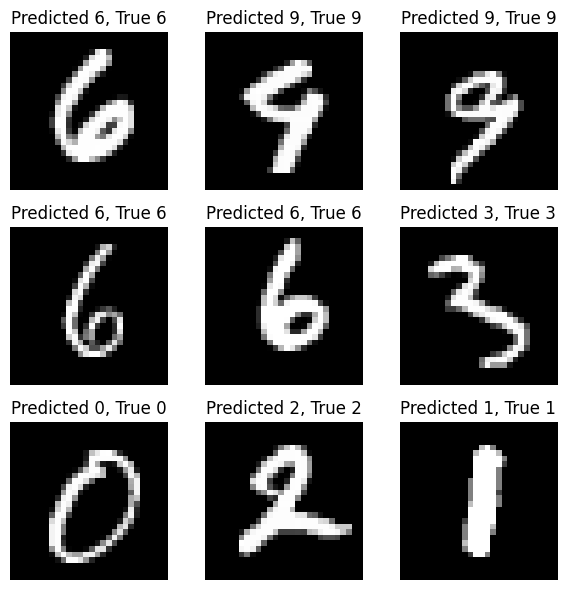

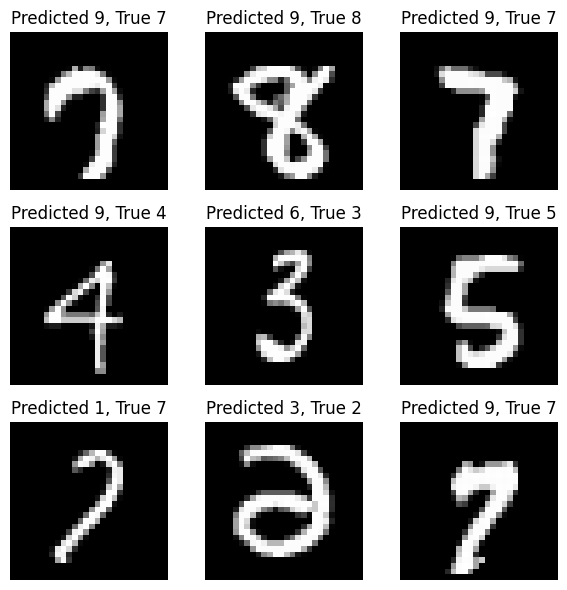

In [4]:
# Hiển thị các kết quả đúng và sai
correct_indices = np.nonzero(nb_predictions == test_labels)[0]
incorrect_indices = np.nonzero(nb_predictions != test_labels)[0]

import matplotlib.pyplot as plt

# Hàm chuyển đổi từ ảnh 1D thành 2D
def reshape_image(flat_image, size=28):
    return flat_image.reshape(size, size)

# Hiển thị các hình ảnh đúng
plt.figure(figsize=(6, 6))  # Tăng kích thước hình
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(reshape_image(test_images[correct]), cmap='gray', interpolation='none') 
    plt.title(f"Predicted {nb_predictions[correct]}, True {test_labels[correct]}")  # Sửa tiêu đề
    plt.axis("off")

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị các hình ảnh sai
plt.figure(figsize=(6, 6))  # Tăng kích thước hình
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(reshape_image(test_images[incorrect]), cmap='gray', interpolation='none') 
    plt.title(f"Predicted {nb_predictions[incorrect]}, True {test_labels[incorrect]}")  # Sửa tiêu đề
    plt.axis("off")

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()
plt.show()


4. Xây dựng chương trình sử dụng mô hình ANN

Đưa dữ liệu về dạng ảnh 10*10 pixels (sử dụng phân tích thành phần chính PCA gộp chung cả train_images và test_images)

Xây dựng chương trình sử dụng mô hình ANN (đã giảm số chiều của mô hình về 100 trên toàn bộ data)

Accuracy of ANN: 96.78%
Confusion Matrix:
 [[ 926    0    0    0    1    8    0    1    4    6]
 [   0 1092    7    1    0    4    3    0    3    0]
 [   3    5  986    5    0    0    4   13    5    2]
 [   0    0   14  953    5    5    0    6    4    8]
 [   2    0    4    3  988    0    4    5    3    7]
 [   3    0    0   16    6  878    5    4    4    4]
 [   8    0    3    1    7   10  973    0    0    3]
 [   0    1    8    9    3    0    0  979    1    4]
 [   3    0    6    5    5    6    2   10  931    8]
 [   0    0    0    6   14    1    0    7    4  972]]
Recall of Artificial Neural Network: 96.78%
Precision of Artificial Neural Network: 96.79%
F1-Score of Artificial Neural Network: 96.78%


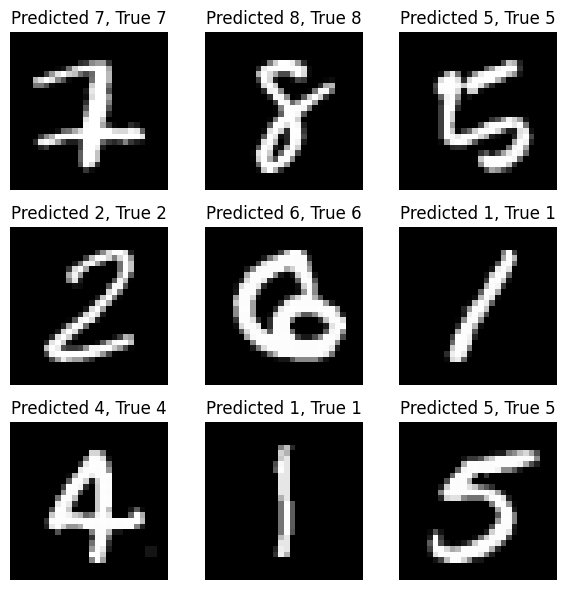

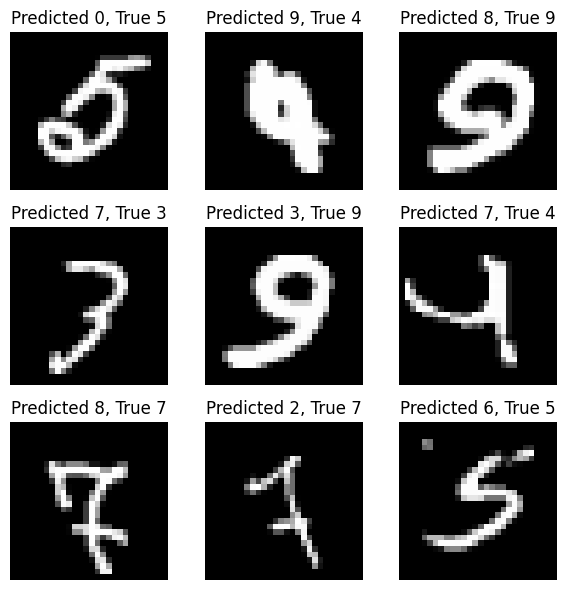

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

# Lấy dữ liệu MNIST
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle=True) 
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True) 

# Chuẩn hóa dữ liệu
all_images = np.concatenate([train_images, test_images], axis=0)
all_labels = np.concatenate([train_labels, test_labels], axis=0)
scaler = StandardScaler()
all_images_scaled = scaler.fit_transform(all_images)

# Áp dụng PCA để giảm số chiều
pca = PCA(n_components=100)
all_images_pca = pca.fit_transform(all_images_scaled)

# Tách lại tập huấn luyện và kiểm tra
X_train = all_images_pca[:60000]  # 60,000 đầu
y_train = all_labels[:60000]

X_test = all_images_pca[-10000:]  # 10,000 cuối
y_test = all_labels[-10000:]

# Huấn luyện ANN
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000)
ann.fit(X_train, y_train)

# Dự đoán và đánh giá trên tập kiểm tra
ann_predictions = ann.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)
print("Accuracy of ANN: {:.2f}%".format(ann_accuracy * 100))

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, ann_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Tính recall (tỷ lệ khôi phục)
ann_recall = recall_score(y_test, ann_predictions, average='weighted')  # Sử dụng 'weighted' để tính trên các lớp không cân bằng
print("Recall of Artificial Neural Network: {:.2f}%".format(ann_recall * 100))

# Tính precision (độ chính xác)
ann_precision = precision_score(y_test, ann_predictions, average='weighted')  # Sử dụng 'weighted' để tính trên các lớp không cân bằng
print("Precision of Artificial Neural Network: {:.2f}%".format(ann_precision * 100))

# Tính F1-Score (sự cân bằng giữa recall và precision)
ann_f1 = f1_score(y_test, ann_predictions, average='weighted')
print("F1-Score of Artificial Neural Network: {:.2f}%".format(ann_f1 * 100))

# Hiển thị các kết quả đúng và sai
correct_indices = np.nonzero(ann_predictions == y_test)[0]
incorrect_indices = np.nonzero(ann_predictions != y_test)[0]

# Hiển thị các hình ảnh từ tập kiểm tra
# Ở đây, bạn cần sử dụng dữ liệu gốc (không qua PCA) để có thể hiển thị đúng hình ảnh

def reshape_image(flat_image, size=28):
    return flat_image.reshape(size, size)

plt.figure(figsize=(6, 6))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(reshape_image(test_images[correct]), cmap='gray', interpolation='none') 
    plt.title(f"Predicted {ann_predictions[correct]}, True {y_test[correct]}")
    plt.axis("off")

plt.tight_layout()

plt.figure(figsize=(6, 6))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(reshape_image(test_images[incorrect]), cmap='gray', interpolation='none') 
    plt.title(f"Predicted {ann_predictions[incorrect]}, True {y_test[incorrect]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [6]:
# Dự đoán và đánh giá trên tập kiểm tra
ann_predictions = ann.predict(X_train)
ann_accuracy = accuracy_score(y_train, ann_predictions)
print("Accuracy of ANN of train data: {:.2f}%".format(ann_accuracy * 100))

Accuracy of ANN of train data: 100.00%


In [7]:
# Tính tổng tỷ lệ phương sai được giải thích
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = explained_variance_ratio.sum() * 100  # Chuyển thành phần trăm

print("Total Explained Variance after PCA:", total_explained_variance)

Total Explained Variance after PCA: 71.19804469029827


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class = 'multinomial', solver='sag', max_iter=2000)
model.fit(train_images, train_labels)

# Dự đoán và đánh giá trên tập kiểm tra
predictions = model.predict(test_images)
softmax_accuracy = accuracy_score(test_labels, predictions)
print("Accuracy of SoftMax: {:.2f}%".format(softmax_accuracy * 100))

Accuracy of SoftMax: 91.09%
